In [1]:
import telegram
import telepot
import pandas as pd
import FinanceDataReader as fdr
import datetime
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from io import StringIO
from bob_telegram_tools.bot import TelegramBot
import random
from bs4 import BeautifulSoup
import requests
import OpenDartReader
import dataframe_image as dfi

token = '5824934528:AAEnCowAhJxHrW_6xuN5oE3Irx0rwK5NPwE'
mc = '5130278207'
bot = telepot.Bot(token)

color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'cyan', 'deepskyblue', 'darkviolet', 'deeppink']

url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=101&sid2=258'

api = '7a4516f8fa4871f7553a4dcf5ecf9966150b920b'

fredapi = '71b1de5b06189261b4b5be7ad8dd2d59'

dart = OpenDartReader(api)
def sc(data1, data2):
    return fdr.DataReader(str(data1), start = str(data2))["Close"]

def yc(d1, d2):
    return (fdr.DataReader(str(d1), start = str(d2))["Close"].pct_change()*100).dropna()

def fs(c1, c2):
    return dart.finstate(c1,c2)
    

pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

def handle(msg):
    if msg['text'] == "hi" or msg['text'] == "hello" or msg['text'] == "안녕" or msg['text'] == "ㅎㅇ" or msg['text'] == "안녕하세요" or msg['text'] == "인사":
        bot.sendMessage(msg['from']['id'], "하이")

    elif len(msg['text']) == 20 and '{}{}'.format(msg['text'][0], msg['text'][1]) == '주가' and '{}{}{}{}{}{}'.format(msg['text'][2], msg['text'][3], msg['text'][4], msg['text'][5], msg['text'][6], msg['text'][7]).isdigit() == True and '{}{}'.format(msg['text'][8], msg['text'][19]) == '()':
        bot.sendMessage(msg['from']['id'], text = str(sc(str('{}{}{}{}{}{}'.format(msg['text'][2], msg['text'][3], msg['text'][4], msg['text'][5], msg['text'][6], msg['text'][7])), str('{}{}{}{}-{}{}-{}{}'.format(msg['text'][9], msg['text'][10], msg['text'][11], msg['text'][12], msg['text'][14], msg['text'][15],msg['text'][17], msg['text'][18])))))

    elif len(msg['text']) == 21 and '{}{}{}'.format(msg['text'][0], msg['text'][1], msg['text'][2]) == '수익률' and '{}{}{}{}{}{}'.format(msg['text'][3], msg['text'][4], msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8]).isdigit() == True and '{}{}'.format(msg['text'][9], msg['text'][20]) == '()':
        bot.sendMessage(msg['from']['id'], text = str(yc(str('{}{}{}{}{}{}'.format(msg['text'][3], msg['text'][4], msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8])), str('{}{}{}{}-{}{}-{}{}'.format( msg['text'][10], msg['text'][11], msg['text'][12],msg['text'][13], msg['text'][15], msg['text'][16],msg['text'][18], msg['text'][19])))))

    elif len(msg['text']) == 6 and '{}{}{}{}{}{}'.format(msg['text'][0], msg['text'][1], msg['text'][2], msg['text'][3], msg['text'][4], msg['text'][5]) == '/start' :
        bot.sendMessage(msg['from']['id'], text = "누구세요;;")

    elif len(msg['text']) == 20 and '{}{}'.format(msg['text'][0], msg['text'][1]) == '차트' and '{}{}{}{}{}{}'.format(msg['text'][2], msg['text'][3], msg['text'][4], msg['text'][5], msg['text'][6], msg['text'][7]).isdigit() == True and '{}{}'.format(msg['text'][8], msg['text'][19]) == '()':
        plt.figure(figsize=(20, 10))
        plt.plot(sc(str('{}{}{}{}{}{}'.format(msg['text'][2], msg['text'][3], msg['text'][4], msg['text'][5], msg['text'][6], msg['text'][7])), str('{}{}{}{}-{}{}-{}{}'.format(msg['text'][9], msg['text'][10], msg['text'][11], msg['text'][12], msg['text'][14], msg['text'][15],msg['text'][17], msg['text'][18]))), c='black')
        plt.xlabel("Trading days")
        plt.ylabel("Price(KRW)")
        plt.title('{}{}{}{}{}{}'.format(msg['text'][2], msg['text'][3], msg['text'][4], msg['text'][5], msg['text'][6], msg['text'][7]))
        plt.margins(x=0, y=0)
        ax = plt.gca()
        ax.set_facecolor(random.choice(color))
        ax.set_alpha(0.2)
        plt.savefig('chart.png')
        bot.sendPhoto(msg['from']['id'], photo = open('chart.png', 'rb'))
        plt.clf()
    elif len(msg['text']) == 23 and '{}{}{}{}{}'.format(msg['text'][0], msg['text'][1],msg['text'][2], msg['text'][3], msg['text'][4]) == '99VaR' and '{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]).isdigit() == True and '{}{}'.format(msg['text'][11], msg['text'][22]) == '()':
        stocka = sc(('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10])), str('{}{}{}{}-{}{}-{}{}'.format( msg['text'][12], msg['text'][13], msg['text'][14],msg['text'][15], msg['text'][17], msg['text'][18],msg['text'][20], msg['text'][21])))
        stock_before = stocka.shift(1)
        yield_df = stocka.pct_change() * 100
        yield_df_before = yield_df.shift(1)
        yield_df = yield_df.loc[~(yield_df==0)]
        m = yield_df.sum() / len(yield_df)
        variance = np.var(yield_df)
        std = np.std(yield_df)
        std_before = np.std(yield_df_before)
        sigma = pd.DataFrame(columns=["std"])
        dur = 5
        for i in range(0, len(yield_df) - dur):
            std = np.std(yield_df.iloc[i : i + dur])
            sigma.loc[i] = [std]
        sigma = sigma.dropna()
        plt.figure(figsize=(20, 10))
        plt.subplot(211)
        plt.plot(stocka, c='black')
        plt.title('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]))
        plt.xlabel("Trading Days")
        plt.ylabel("Price")
        plt.margins(x=0, y=0)
        plt.subplot(212)
        plt.plot(2.58 * sigma, c='red')
        plt.gca().axes.xaxis.set_visible(False)
        plt.ylabel("99% VaR, std calculation period = 5 trading days")
        plt.title({'99% VaR of', '{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10])})
        plt.margins(x=0, y=0)
        plt.savefig('99var.png')
        bot.sendPhoto(msg['from']['id'], photo = open('99var.png', 'rb'))
        plt.clf()        
    elif len(msg['text']) == 23 and '{}{}{}{}{}'.format(msg['text'][0], msg['text'][1],msg['text'][2], msg['text'][3], msg['text'][4]) == '95VaR' and '{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]).isdigit() == True and '{}{}'.format(msg['text'][11], msg['text'][22]) == '()':
        stocka = sc(('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10])), str('{}{}{}{}-{}{}-{}{}'.format( msg['text'][12], msg['text'][13], msg['text'][14],msg['text'][15], msg['text'][17], msg['text'][18],msg['text'][20], msg['text'][21])))
        stock_before = stocka.shift(1)
        yield_df = stocka.pct_change() * 100
        yield_df_before = yield_df.shift(1)
        yield_df = yield_df.loc[~(yield_df==0)]
        m = yield_df.sum() / len(yield_df)
        variance = np.var(yield_df)
        std = np.std(yield_df)
        std_before = np.std(yield_df_before)
        sigma = pd.DataFrame(columns=["std"])
        dur = 5
        for i in range(0, len(yield_df) - dur):
            std = np.std(yield_df.iloc[i : i + dur])
            sigma.loc[i] = [std]
        sigma = sigma.dropna()
        plt.figure(figsize=(20, 10))
        plt.subplot(211)
        plt.plot(stocka, c='black')
        plt.title('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]))
        plt.xlabel("Trading Days")
        plt.ylabel("Price")
        plt.margins(x=0, y=0)
        plt.subplot(212)
        plt.plot(1.96 * sigma, c='red')
        plt.gca().axes.xaxis.set_visible(False)
        plt.ylabel("95% VaR, std calculation period = 5 trading days")
        plt.title({'95% VaR of', '{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10])})
        plt.margins(x=0, y=0)
        plt.savefig('95var.png')
        bot.sendPhoto(msg['from']['id'], photo = open('95var.png', 'rb'))
        plt.clf()        
    
    elif len(msg['text']) == 23 and '{}{}{}{}{}'.format(msg['text'][0], msg['text'][1],msg['text'][2], msg['text'][3], msg['text'][4]) == '스토캐스틱' and '{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]).isdigit() == True and '{}{}'.format(msg['text'][11], msg['text'][22]) == '()':
        stoc = sc(('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10])), str('{}{}{}{}-{}{}-{}{}'.format( msg['text'][12], msg['text'][13], msg['text'][14],msg['text'][15], msg['text'][17], msg['text'][18],msg['text'][20], msg['text'][21])))
        stoc = pd.DataFrame(stoc)
        stoch = pd.DataFrame()
        stochm = pd.DataFrame()
        for i in range(len(stoc)-5):
            stocdf = pd.DataFrame([stoc.iat[i, 0], stoc.iat[i+1, 0], stoc.iat[i+2, 0], stoc.iat[i+3, 0], stoc.iat[i+4, 0]])
            stocdfmin = stocdf.min()
            stocdfmax = stocdf.max()
            stocdf2 = pd.DataFrame((100*(stoc.iat[i+4, 0] - stocdfmin)) / (stocdfmax - stocdfmin+0.000005))
            stoch = stoch.append(stocdf2)
        stoch = stoch.reset_index()
        stoch = stoch.iloc[:, 1]
        stoch = stoch - 50
        plt.figure(figsize=(20, 10))
        plt.subplot(211)
        plt.plot(stoc, c='black')
        plt.title('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]))
        plt.xlabel("Trading Days")
        plt.ylabel("Price")
        plt.margins(x=0, y=0)
        plt.subplot(212)
        plt.plot(stoch, c= 'red')
        plt.plot(stochm, c='blue')
        plt.gca().axes.xaxis.set_visible(False)
        plt.ylabel("Stochastic")
        plt.title({'{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10])})
        plt.savefig('stochastic.png')
        bot.sendPhoto(msg['from']['id'], photo = open('stochastic.png', 'rb'))
        plt.clf()      
    elif len(msg['text']) == 17 and '{}{}{}{}{}'.format(msg['text'][0], msg['text'][1], msg['text'][2], msg['text'][3], msg['text'][4]) == '사업보고서' :
        dart = fs('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]), '{}{}{}{}'.format(msg['text'][12], msg['text'][13], msg['text'][14], msg['text'][15]))
        dart = dart.iloc[:, [2, 6, 8, 9, 10, 12, 15, 18]]
        dart.columns = ['사업연도', '개별/연결명', '재무제표명', '계정명', '당기명', '당기금액', '전기금액', '전전기금액']
        dfi.export(dart, 'finstate.png')
        bot.sendPhoto(msg['from']['id'], photo = open('finstate.png', 'rb'))



    else :
        bot.sendMessage(msg['from']['id'], "그런 명령어는 없어")
bot.message_loop(handle)

[0125/185505.968248:INFO:headless_shell.cc(223)] 274602 bytes written to file /var/folders/sr/hvbn68px2w18vnnt8_m6s9nc0000gn/T/tmpdd7pj115/temp.png
[0125/185709.844340:INFO:headless_shell.cc(223)] 283521 bytes written to file /var/folders/sr/hvbn68px2w18vnnt8_m6s9nc0000gn/T/tmpqruqa1hm/temp.png
Traceback (most recent call last):
  File "/Users/parkjaeyun/opt/anaconda3/lib/python3.9/site-packages/telepot/__init__.py", line 1408, in collector
    callback(item)
  File "/var/folders/sr/hvbn68px2w18vnnt8_m6s9nc0000gn/T/ipykernel_34527/2853509259.py", line 43, in handle
    if msg['text'] == "hi" or msg['text'] == "hello" or msg['text'] == "안녕" or msg['text'] == "ㅎㅇ" or msg['text'] == "안녕하세요" or msg['text'] == "인사":
KeyError: 'text'
[0125/190204.270792:INFO:headless_shell.cc(223)] 142074 bytes written to file /var/folders/sr/hvbn68px2w18vnnt8_m6s9nc0000gn/T/tmp_4hwdnol/temp.png


{'status': '013', 'message': '조회된 데이타가 없습니다.'}


Traceback (most recent call last):
  File "/Users/parkjaeyun/opt/anaconda3/lib/python3.9/site-packages/telepot/__init__.py", line 1408, in collector
    callback(item)
  File "/var/folders/sr/hvbn68px2w18vnnt8_m6s9nc0000gn/T/ipykernel_34527/2853509259.py", line 166, in handle
    dart = fs('{}{}{}{}{}{}'.format(msg['text'][5], msg['text'][6], msg['text'][7], msg['text'][8], msg['text'][9], msg['text'][10]), '{}{}{}{}'.format(msg['text'][12], msg['text'][13], msg['text'][14], msg['text'][15]))
  File "/var/folders/sr/hvbn68px2w18vnnt8_m6s9nc0000gn/T/ipykernel_34527/2853509259.py", line 35, in fs
    return dart.finstate(c1,c2)
  File "/Users/parkjaeyun/opt/anaconda3/lib/python3.9/site-packages/OpenDartReader/dart.py", line 105, in finstate
    return dart_finstate.finstate(self.api_key, corp_code, bsns_year, reprt_code)
  File "/Users/parkjaeyun/opt/anaconda3/lib/python3.9/site-packages/OpenDartReader/dart_finstate.py", line 27, in finstate
    print('전자공시의 재무데이터는 2015년 이후 데이터를 제공합니다') 

In [9]:
stocka = sc('237880', '2022-12-30')
stocka = pd.DataFrame(stocka)
stocka = stocka.reset_index()
stocka.iloc[:, 1]

0     16300
1     16200
2     16600
3     16650
4     17000
5     17950
6     17100
7     17650
8     18000
9     17750
10    17900
11    17900
12    18450
13    18450
14    18350
15    17740
Name: Close, dtype: int64

HTTP Error 404: Not Found  - symbol "KORRGDPR"not found or invalid periods


[]

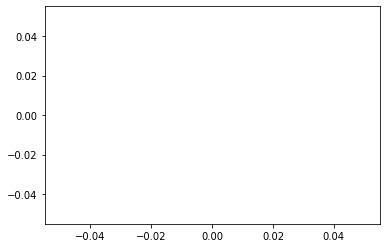

In [11]:
sy = fdr.DataReader('KORRGDPR')
plt.plot(sy)

[*********************100%***********************]  1 of 1 completed


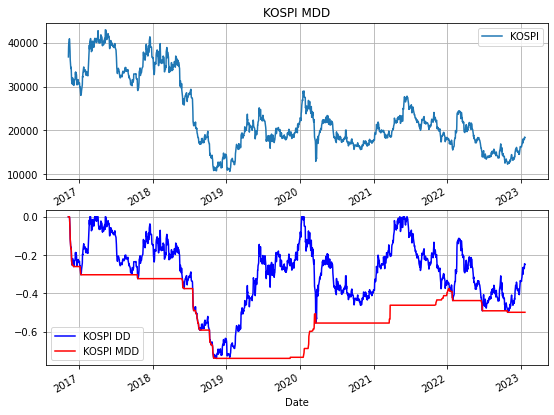

In [25]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo('237880.KS', '2004-01-04') # KOSPI 지수의 심볼은 ^KS11

window = 252  # 산정 기간에 해당하는 1년치 252일로 가정
# rolling 함수는 윈도우 크기에 해당하는 개수만큼 데이터를 추출하여 집계함수에 해당 연산을 실시
# 집계함수로  max(), mean(), min()
# 1년 동안의 최고 값 peak 구하기
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()  # min_periods를 지정하면 데이터 개수가 윈도우 크기에 못 미쳐도 연산 수행
drawdown = kospi['Adj Close']/peak - 1.0  # 최고치 대비 현재 KOSPI 종가가 얼마나 하락했는지 
# drawdown의 최저치가 MDD가 된다.
max_dd = drawdown.rolling(window, min_periods=1).min()
 
plt.figure(figsize=(9, 7))
plt.subplot(211) # 2행 1열 중 1행에 그린다. 
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212) # 2행 1열 중 2행에 그린다. 
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.savefig('test.png') # test.png 이름으로 저장